In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
nuqta = sns.load_dataset('dots')

In [4]:
palette = sns.color_palette('rocket_r')

In [5]:
palette

[(0.96516917, 0.70776351, 0.5606593),
 (0.95381595, 0.46373781, 0.31769923),
 (0.8833417, 0.19830556, 0.26014181),
 (0.67824099, 0.09192342, 0.3504148),
 (0.43860848, 0.12177004, 0.34119475),
 (0.20973515, 0.09747934, 0.24238489)]

In [6]:
nuqta.head()

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


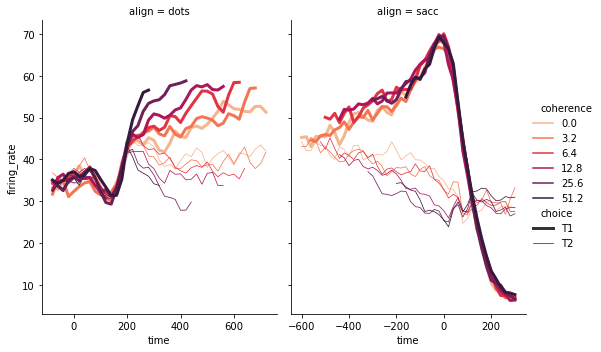

In [7]:
sns.relplot(data=nuqta, x='time', y='firing_rate',
            hue='coherence', size='choice', col='align',
            kind='line', size_order=['T1', 'T2'], 
           palette=palette, height=5, aspect=.75,
           facet_kws=dict(sharex=False),)

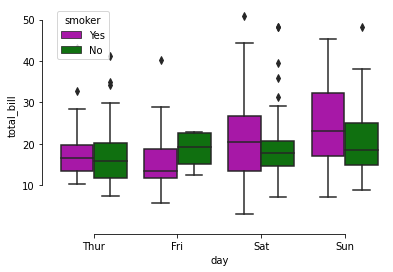

In [8]:
tips = sns.load_dataset('tips')

sns.boxplot(data=tips, x='day', y='total_bill',
            hue='smoker', palette=['m', 'g'])

sns.despine(offset=10, trim=True)

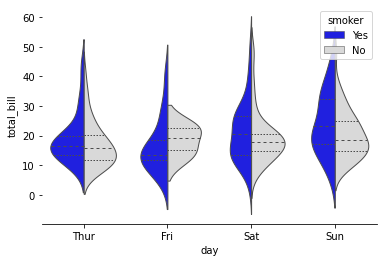

In [9]:
sns.violinplot(data=tips, x='day', y='total_bill', hue='smoker', split=True, inner='quart', linewidth=1,
               palette={"Yes": "b", "No": ".85" })
sns.despine(left=True
           )

<AxesSubplot:xlabel='carat', ylabel='price'>

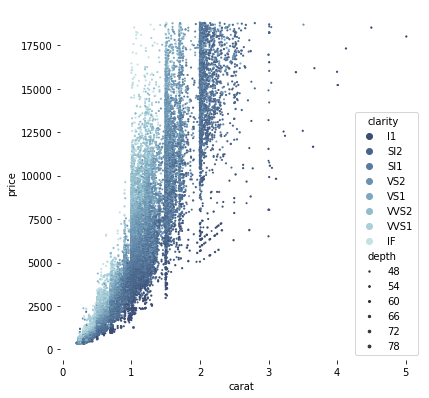

In [10]:
diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ['I1', "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2, d=.3_r",
                hue_order=clarity_ranking,
               sizes=(1, 8), linewidth=0,
               data=diamonds, ax=ax)

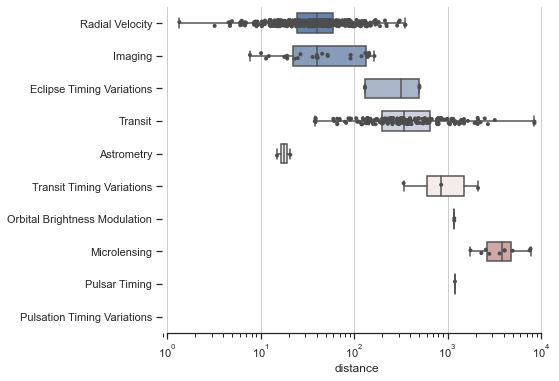

In [12]:
sns.set_theme(style='ticks')

f, ax = plt.subplots(figsize=(7, 6))
ax.set_xscale("log")

planets = sns.load_dataset("planets")

sns.boxplot(x="distance", y="method", data=planets,
            whis=[0, 100], width=.6, palette='vlag')


sns.stripplot(x="distance", y="method", data=planets,
             size=4, color=".3", linewidth=0)

ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

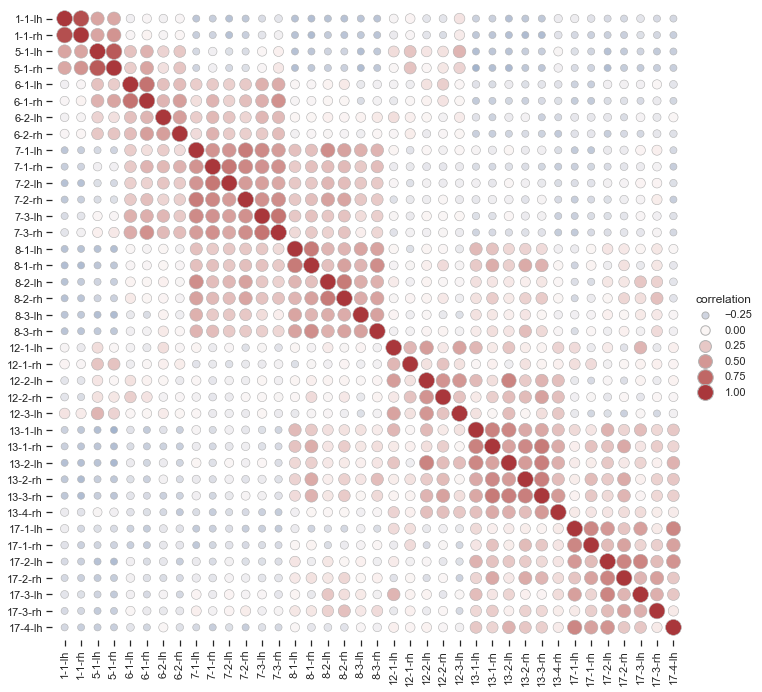

In [14]:
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values("network")
                  .astype(int)
                  .isin(used_networks))
               
df = df.loc[:, used_columns]

df.columns = df.columns.map("-".join)

corr_mat = df.corr().stack().reset_index(name="correlation")

g = sns.relplot(
    data = corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)

for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")

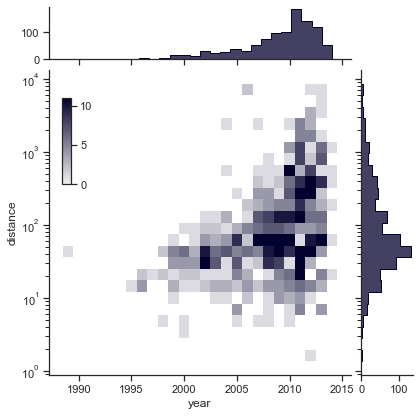

In [19]:
plannets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

g.ax_joint.set(yscale='log')

cax = g.figure.add_axes([.15, .55, .02, .2])

g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)

g.plot_marginals(sns.histplot, element="step", color="#03012d")